In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import  KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [ ]:
stars = pd.read_csv('.../star.csv')
stars.shape

(64000, 8)

In [ ]:
stars.head()

,x,y,z,vx,vy,vz,m,id
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016,1
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016,2
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016,3
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016,4
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016,5


In [ ]:
stars = stars.loc[:,stars.columns != 'id']
stars.head()

,x,y,z,vx,vy,vz,m
0,0.485939,-0.524359,-0.531982,0.461539,-0.033776,-0.322765,0.000016
1,-0.065961,0.080844,-0.276031,-0.575780,1.107815,-0.293408,0.000016
2,-0.034809,0.076795,-0.390880,-0.553991,-0.173861,0.059251,0.000016
3,1.502104,1.442983,1.449747,-0.090266,0.326612,-0.310594,0.000016
4,-0.009554,0.538341,-0.267264,0.011855,-0.011874,-0.405565,0.000016


In [ ]:
stars.isnull().sum()

x     0
y     0
z     0
vx    0
vy    0
vz    0
m     0
dtype: int64

In [ ]:
stars.describe()

,x,y,z,vx,vy,vz,m
count,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04,6.400000e+04
mean,-1.176596e-10,3.412734e-10,2.464757e-10,1.101956e-10,2.103394e-10,1.820625e-11,1.562500e-05
std,7.807475e-01,7.814718e-01,7.719907e-01,4.088337e-01,4.078873e-01,4.080323e-01,2.483520e-17
min,-4.698981e+00,-5.095714e+00,-5.015129e+00,-1.619203e+00,-1.482613e+00,-1.685246e+00,1.562500e-05
25%,-3.348223e-01,-3.366134e-01,-3.356278e-01,-2.697400e-01,-2.714544e-01,-2.709821e-01,1.562500e-05
50%,-4.818202e-04,-4.321573e-04,-3.949339e-03,-2.090700e-04,1.419134e-03,1.770830e-04,1.562500e-05
75%,3.347058e-01,3.321014e-01,3.305091e-01,2.691137e-01,2.707544e-01,2.700553e-01,1.562500e-05
max,5.401047e+00,5.680950e+00,4.762590e+00,1.547319e+00,1.584202e+00,1.600681e+00,1.562500e-05


In [ ]:
stars.columns

Index(['x', 'y', 'z', 'vx', 'vy', 'vz', 'm'], dtype='object')

In [ ]:
stars.dtypes

x     float64
y     float64
z     float64
vx    float64
vy    float64
vz    float64
m     float64
dtype: object

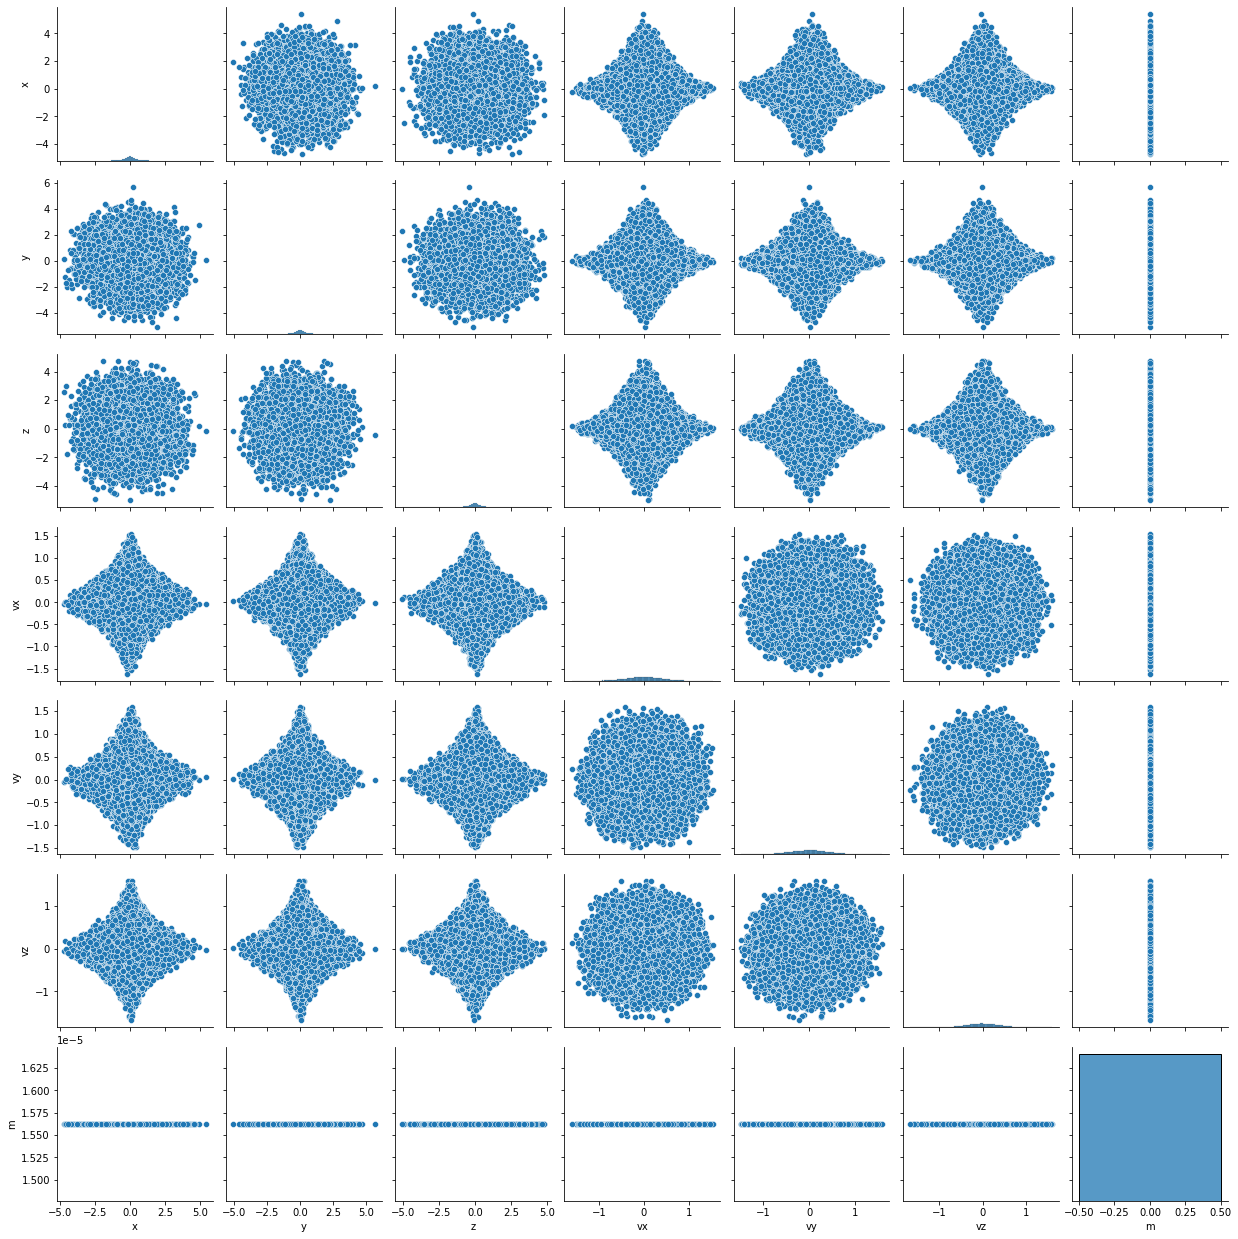

In [ ]:
sns.pairplot(stars)

## Dados Originais

In [ ]:
stars2 = stars.iloc[:,[0,3]]
stars2.head()

,x,vx
0,0.485939,0.461539
1,-0.065961,-0.575780
2,-0.034809,-0.553991
3,1.502104,-0.090266
4,-0.009554,0.011855


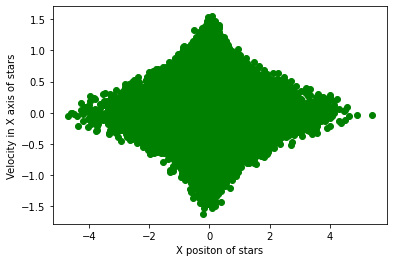

In [ ]:
plt.scatter(stars2.x,stars2.vx,color="green")
plt.xlabel("X positon of stars")
plt.ylabel("Velocity in X axis of stars")
plt.show()

## Dados Padronizados

In [ ]:
sc = StandardScaler()

stars_std = sc.fit_transform(stars)
stars_std = pd.DataFrame(stars_std)

In [ ]:
stars2_std = stars_std.iloc[:,[0,3]]
stars2_std.columns = ['x', 'vx']
stars2_std.head()

,x,vx
0,0.622407,1.128925
1,-0.084485,-1.408359
2,-0.044585,-1.355064
3,1.923946,-0.220790
4,-0.012236,0.028996


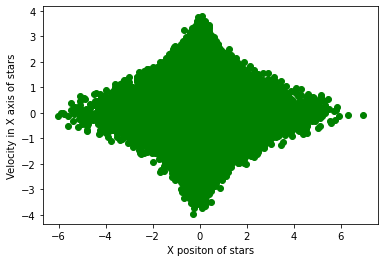

In [ ]:
plt.scatter(stars2_std.x,stars2_std.vx,color="green")
plt.xlabel("X positon of stars")
plt.ylabel("Velocity in X axis of stars")
plt.show()

# **K-Means**

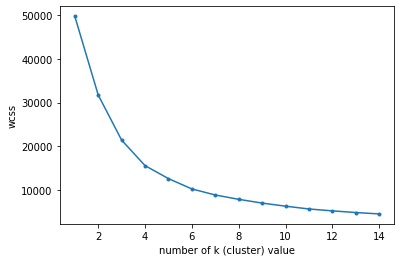

In [ ]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stars2)
    wcss.append(kmeans.inertia_) # inertia means that find to value of wcss
    
plt.plot(range(1,15),wcss,'.-')
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

[]

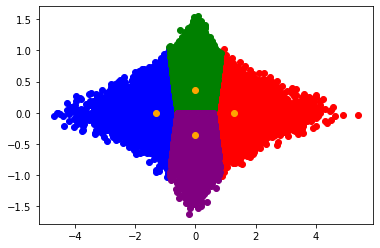

In [ ]:
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(stars2)

stars2["label"] = clusters

plt.scatter(stars2.x[stars2.label == 0], stars2.vx[stars2.label == 0], color="red")
plt.scatter(stars2.x[stars2.label == 1], stars2.vx[stars2.label == 1], color="blue")
plt.scatter(stars2.x[stars2.label == 2], stars2.vx[stars2.label == 2], color="green")
plt.scatter(stars2.x[stars2.label == 3], stars2.vx[stars2.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler
plt.plot()

# **K-Means Padronizado**

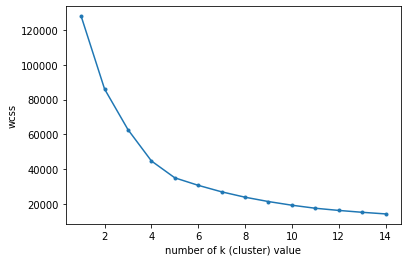

In [ ]:
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(stars2_std)
    wcss.append(kmeans.inertia_) # inertia means that find to value of wcss
    
plt.plot(range(1,15),wcss,'.-')
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

[]

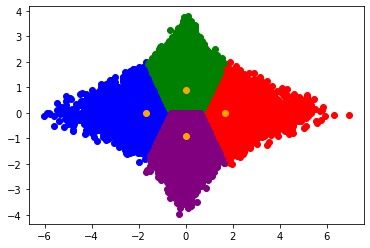

In [ ]:
kmean2 = KMeans(n_clusters=4)
clusters = kmean2.fit_predict(stars2_std)

stars2_std["label"] = clusters

plt.scatter(stars2_std.x[stars2_std.label == 0], stars2_std.vx[stars2_std.label == 0], color="red")
plt.scatter(stars2_std.x[stars2_std.label == 1], stars2_std.vx[stars2_std.label == 1], color="blue")
plt.scatter(stars2_std.x[stars2_std.label == 2], stars2_std.vx[stars2_std.label == 2], color="green")
plt.scatter(stars2_std.x[stars2_std.label == 3], stars2_std.vx[stars2_std.label == 3], color="purple")

plt.scatter(kmean2.cluster_centers_[:,0],kmean2.cluster_centers_[:,1], color="orange") # scentroidler
plt.plot()

# **Clusterização Hierárquica**

In [ ]:
stars3 = stars2.iloc[:,stars2.columns != 'label'].head(1000)

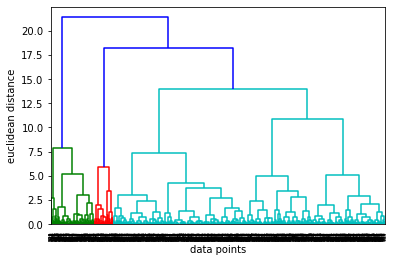

In [ ]:
merg = linkage(stars3, method="ward") # scipy is an algorithm of hiyerarchal clusturing
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(stars3)

stars3["label"] = cluster

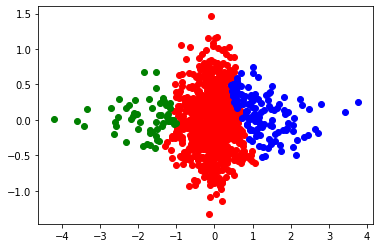

In [ ]:
plt.scatter(stars3.x[stars3.label == 0], stars3.vx[stars3.label == 0], color="red")
plt.scatter(stars3.x[stars3.label == 1], stars3.vx[stars3.label == 1], color="blue")
plt.scatter(stars3.x[stars3.label == 2], stars3.vx[stars3.label == 2], color="green")


# **Clusterização Hierárquica Padronizada**

In [ ]:
stars3_std = stars2_std.iloc[:,stars2_std.columns != 'label'].head(1000)

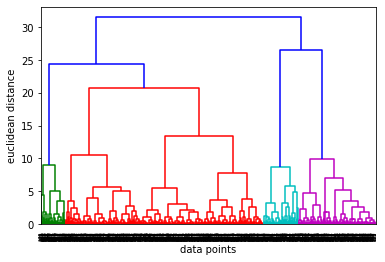

In [ ]:
merg = linkage(stars3_std, method="ward") # scipy is an algorithm of hiyerarchal clusturing
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [ ]:
hiyerartical_cluster = AgglomerativeClustering(n_clusters=4, affinity="euclidean",linkage="ward")
cluster = hiyerartical_cluster.fit_predict(stars3_std)

stars3_std["label"] = cluster

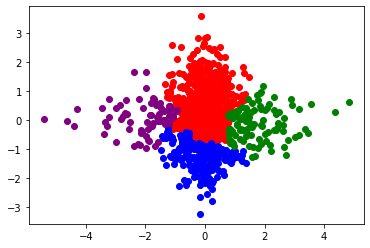

In [ ]:
plt.scatter(stars3_std.x[stars3_std.label == 0], stars3_std.vx[stars3_std.label == 0], color="red")
plt.scatter(stars3_std.x[stars3_std.label == 1], stars3_std.vx[stars3_std.label == 1], color="blue")
plt.scatter(stars3_std.x[stars3_std.label == 2], stars3_std.vx[stars3_std.label == 2], color="green")
plt.scatter(stars3_std.x[stars3_std.label == 3], stars3_std.vx[stars3_std.label == 3], color="purple")

# **DBSCAN**

In [ ]:
stars3 = stars2.iloc[:,stars2.columns != 'label'].head(1000)

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
cluster = db.fit_predict(stars3)

stars3["label"] = cluster
stars3["label"].unique()

array([ 0, -1,  1])

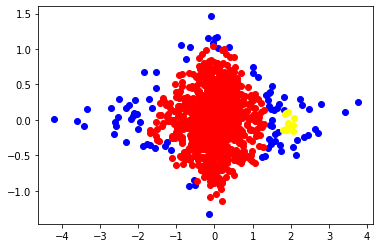

In [ ]:
plt.scatter(stars3.x[stars3.label == -1], stars3.vx[stars3.label == -1], color="blue")
plt.scatter(stars3.x[stars3.label == 0], stars3.vx[stars3.label == 0], color="red")
plt.scatter(stars3.x[stars3.label == 1], stars3.vx[stars3.label == 1], color="yellow")


# **DBSCAN Padronizado**

In [ ]:
stars3_std = stars2_std.iloc[:,stars2_std.columns != 'label'].head(1000)

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
cluster = db.fit_predict(stars3_std)

stars3_std["label"] = cluster
stars3_std["label"].unique()

array([ 0, -1,  1,  2])

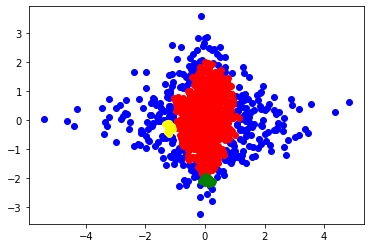

In [ ]:
plt.scatter(stars3_std.x[stars3_std.label == -1], stars3_std.vx[stars3_std.label == -1], color="blue")
plt.scatter(stars3_std.x[stars3_std.label == 0], stars3_std.vx[stars3_std.label == 0], color="red")
plt.scatter(stars3_std.x[stars3_std.label == 1], stars3_std.vx[stars3_std.label == 1], color="yellow")
plt.scatter(stars3_std.x[stars3_std.label == 2], stars3_std.vx[stars3_std.label == 2], color="green")